In [1]:
%matplotlib inline

# Compare corner finders in TEMCA optical images

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import boto3
import cv2
import skimage.io as io
import skimage
from skimage import data
from skimage import feature
from skimage import color
from skimage import filters
from skimage import transform 
from skimage import draw
from skimage import measure
from skimage import morphology
import skdemo
from scipy import ndimage as ndi
import time

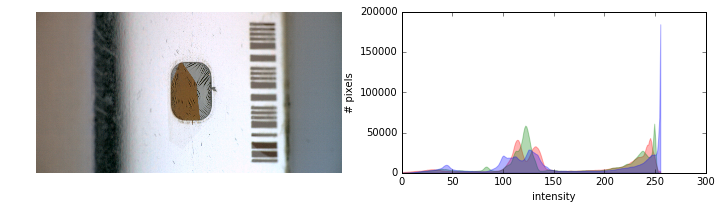

In [3]:
# get an image
from toolbox.TAO.tao import TAO
from toolbox.TAO.taoDB import TAOdb
tao =  TAO()
taoDB = TAOdb()
url = taoDB.get_aperture_image_url('donaldtrump', 'test1', '000040')
im = io.imread(url)
skdemo.imshow_with_histogram(im);

## Retrieve the template for this specimen

(<matplotlib.axes._subplots.AxesSubplot at 0x22030390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2218a048>)

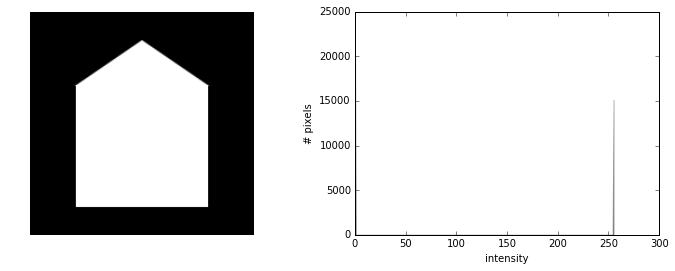

In [4]:
# get the master template for the specimen
url = taoDB.get_specimen_template_url('testspecimen')
template_im = io.imread(url)
skdemo.imshow_with_histogram(template_im)

## Get the boundaries of the template

('Number of coordinates:', 457, 6)


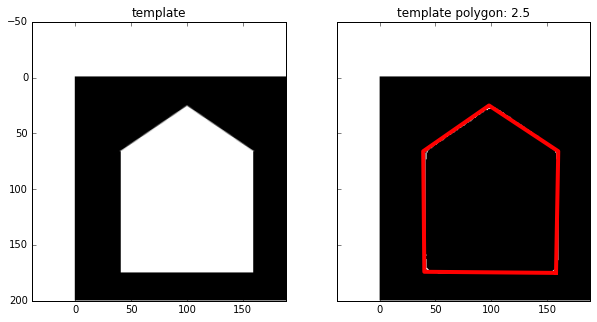

In [6]:
w, h = template_im.shape
image = template_im

edges = feature.canny(image, sigma=4.0)

# Much better solution: find contours and then subsample the polygon
contours = measure.find_contours(image, 0.5)
tolerance1 = 2.5

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5), sharex=True,
                                    sharey=True)
ax0.imshow(image, 'gray')
ax0.set_title('template')

ax1.imshow(edges, 'gray')
ax1.set_title('template polygon: ' + str(tolerance1))

for contour in measure.find_contours(image, 0):
    coords = measure.approximate_polygon(contour, tolerance=tolerance1)
    ax1.plot(coords[:, 1], coords[:, 0], '-r', linewidth=4)
    print("Number of coordinates:", len(contour), len(coords))
    #print coords
    
    
    

### goodFeaturesToTrack doesn't work on binary

exit capture


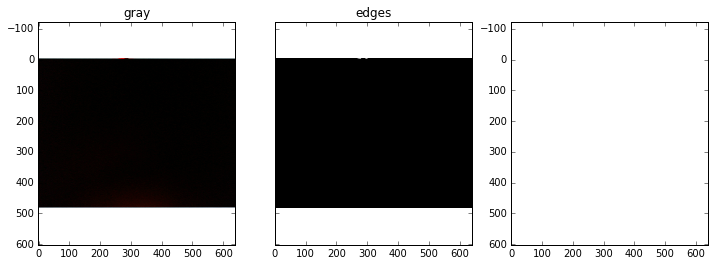

In [41]:
cap = cv2.VideoCapture(0)
frame_count = 0
tolerance1 = 2.5

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4), sharex=True,
                                sharey=True)

ax0.set_title('gray')
ax1.set_title('edges')
ax2.set_title('corners')

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    edges = feature.canny(gray, sigma=4.0)
    edges2 = gray.copy()
    edges2[~edges] = 0
    edges2[edges] = 255
    
    
    ax1.imshow(edges2, 'gray')    
    
    ax2.clear()
    corners = cv2.goodFeaturesToTrack(edges2,6,0.01,40)
    
    if (corners != None):
        corners = np.int0(corners)

        for i in corners:
            x,y = i.ravel()
            cv2.circle(frame,(x,y),10,255,-1)
    
    ax0.imshow(frame)
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.01)

    # 
    if (frame_count > 5 and np.mean(gray) <50):
        break
    frame_count = frame_count + 1
    
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
print ('exit capture')

In [40]:
cap.release()
cv2.destroyAllWindows()

## Get line endpoints

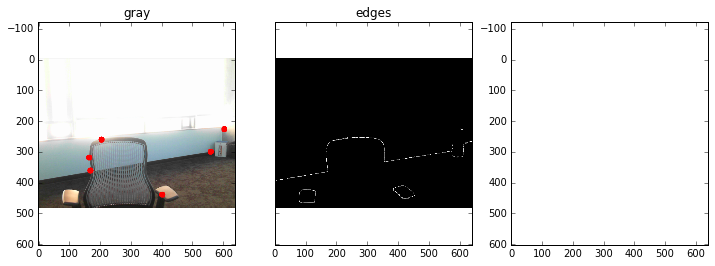

In [ ]:
cap = cv2.VideoCapture(0)
frame_count = 0
tolerance1 = 2.5

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4), sharex=True,
                                sharey=True)

ax0.set_title('gray')
ax1.set_title('edges')
ax2.set_title('corners')

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    edges = feature.canny(gray, sigma=4.0)
    edges2 = gray.copy()
    edges2[~edges] = 0
    edges2[edges] = 255
    
    
    ax1.imshow(edges2, 'gray')    
    
    ax2.clear()
    corners = cv2.goodFeaturesToTrack(edges2,6,0.01,40)
    
    if (corners != None):
        corners = np.int0(corners)

        for i in corners:
            x,y = i.ravel()
            cv2.circle(frame,(x,y),10,255,-1)
    
    ax0.imshow(frame)
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.01)

    # 
    if (frame_count > 5 and np.mean(gray) <50):
        break
    frame_count = frame_count + 1
    
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
print ('exit capture')